<a href="https://colab.research.google.com/github/ariefahshalihah/jabar-movement-2020/blob/main/jabar_movements_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting JABAR Movement Range Maps 2020

Prediksi proporsi masyarakat Jawa Barat berada di rumah dalam 2 pekan

**Source Dataset :**
```
Facebook Movement Range Maps

This data includes movement changes measured by Facebook throughout March,
April, May, and June 2020 starting from a baseline in February. Data is provided in one global tab-delimited text file.

Columns

- ds: Date stamp for movement range data row in YYYY-MM-DD form
- country: Three-character ISO-3166 country code
- polygon_source: Source of region polygon, either â€œFIPSâ€ for U.S. data or â€œGADMâ€ for global data
- polygon_id: Unique identifier for region polygon, either numeric string for U.S. FIPS codes or alphanumeric string for GADM regions
- polygon_name: Region name
- all_day_bing_tiles_visited_relative_change: Positive or negative change in movement relative to baseline
- all_day_ratio_single_tile_users: Positive proportion of users staying put within a single location
- baseline_name: When
 baseline movement was calculated pre-COVID-19
- baseline_type: How baseline movement was calculated pre-COVID-19

https://data.humdata.org/dataset/movement-range-maps
```



## Persiapan Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# import zipfile,os

# # Unduh dataset by !wget
# !wget --no-check-certificate \
# https://data.humdata.org/dataset/c3429f0e-651b-4788-bb2f-4adbf222c90e/resource/55a51014-0d27-49ae-bf92-c82a570c2c6c/download/movement-range-data-2020-12-17.zip \
# -O /content/movement-range-data-2020-12-15.zip

In [7]:
path = '/content/drive/MyDrive/Colab Notebooks/jds/data/'
# zip_ref = zipfile.ZipFile(path + 'movement-range-data-2020-12-15.zip', 'r')
# zip_ref.extractall(path)
# zip_ref.close()

In [8]:
import pandas as pd

# Load Dataset
name = 'movement-range-2020-12-17.txt'
data = pd.read_csv(path + name, sep='\t')

IDN = data.loc[data['country']=="IDN"].reset_index()
IDN.polygon_name = IDN.polygon_name.str.lower()
IDN.head(3)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,index,ds,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type
0,1875196,2020-03-01,IDN,GADM,IDN.1.10_1,aceh timur,-0.11398,0.21641,full_february,DAY_OF_WEEK
1,1875197,2020-03-02,IDN,GADM,IDN.1.10_1,aceh timur,-0.03722,0.18178,full_february,DAY_OF_WEEK
2,1875198,2020-03-03,IDN,GADM,IDN.1.10_1,aceh timur,0.09141,0.18373,full_february,DAY_OF_WEEK


In [9]:
# # LIST KAB/KOTA DI JABAR
# # Source : 'https://data.jabarprov.go.id/dataset/luas-wilayah-provinsi-jawa-barat'

# # Unduh data Jawa Barat by !wget
# !wget --no-check-certificate \
# https://data.jabarprov.go.id/dataset/a8356698-0796-4c63-91f2-7130d2dc7b03/resource/086c40c3-0fae-40df-bd6d-3fc1a8388ea4/download/luas_wilayah.csv \
# -O /content/luas_wilayah.csv

In [10]:
luas_wilayah = pd.read_csv(path + 'luas_wilayah.csv', sep=',')
kota_kab = pd.DataFrame(luas_wilayah['nama_kabupaten']).applymap(str.lower).drop_duplicates()
kota_kab = kota_kab.sort_values(by=['nama_kabupaten']).reset_index(drop=True)

kota_kab.head(5)

,nama_kabupaten
0,bandung
1,bandung barat
2,bekasi
3,bogor
4,ciamis


In [111]:
# MENCARI DATA MOVEMENT KHUSUS DAERAH JABAR
check = IDN.polygon_name.isin([i for i in kota_kab.nama_kabupaten])
dataset_jabar = IDN[check].reset_index(drop=True).drop('index', axis=1)


# simpan dataset
save_path = path + 'movement-range-jabar-2020.csv'
dataset_jabar.to_csv(save_path, sep='\t', index=False)
dataset_jabar.head(2)

,ds,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type
0,2020-03-01,IDN,GADM,IDN.9.11_1,garut,0.02800,0.19507,full_february,DAY_OF_WEEK
1,2020-03-02,IDN,GADM,IDN.9.11_1,garut,0.10211,0.16435,full_february,DAY_OF_WEEK


## Pra-Proses

In [142]:
def ratio_jabar(dataset_jabar, kota_kab):  
  ratio = dataset_jabar[['polygon_name', 'all_day_ratio_single_tile_users']]

  frame = []
  for i in kota_kab.nama_kabupaten:  
    value = ratio[ratio.polygon_name.isin([i])].all_day_ratio_single_tile_users
    ratio_per_region = pd.DataFrame(value)
    ratio_per_region.columns = [i]
  
    frame.append(ratio_per_region)
    
  return pd.concat(frame, axis=1)

dataset_jabar = pd.read_csv(save_path, sep='\t')
dataset_jabar = dataset_jabar.set_index('ds')

dataset_jabar.head(2)

,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type
ds,,,,,,,,
2020-03-01,IDN,GADM,IDN.9.11_1,garut,0.02800,0.19507,full_february,DAY_OF_WEEK
2020-03-02,IDN,GADM,IDN.9.11_1,garut,0.10211,0.16435,full_february,DAY_OF_WEEK


### Visualisasi Data

Text(0, 0.5, 'Ratio Single Tile Users')

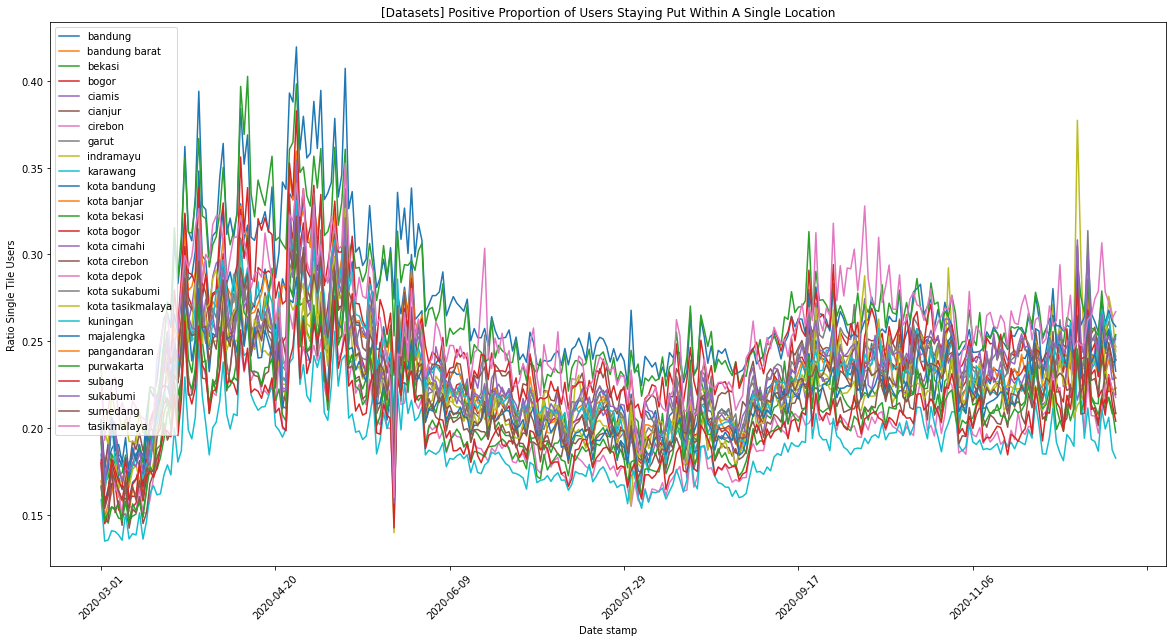

In [146]:
# Plot Grafik Proporsi Masyarakat di Daerah Jawa Barat

data_ratio_jabar = ratio_jabar(dataset_jabar, kota_kab)

ax = data_ratio_jabar.plot.line(title='[Datasets] Positive Proportion of Users Staying Put Within A Single Location', rot=45, figsize=(20,10))
ax.set_xlabel('Date stamp')
ax.set_ylabel('Ratio Single Tile Users')

# Method

## Moving Average (MA)

## Autoregressive Moving Average (ARMA)

## Autoregressive Integrated Moving Average (ARIMA)